# Importing packages


In [1]:
# Pandas provides data structures like DataFrame and Series that allow easy handling of data.
import pandas as pd

# For numerical Calculations
import numpy as np

# EDA imports
# Libraries for data visualization.
import matplotlib.pyplot as plt # Matplotlib is the basic plotting library
import seaborn as sns           # Seaborn provides higher-level and aesthetically pleasing visualizations.

# It contains a wide range of algorithms for classification, regression, clustering, dimensionality reduction, etc.
# Used for model building, data processing, 
import sklearn

# Some functions of sklearn module

# It scales the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

# A function to split the dataset into training and testing sets. 
# It's essential for evaluating model performance on unseen data.
from sklearn.model_selection import train_test_split

# A classification algorithm used for binary and multi-class classification tasks.
from sklearn.linear_model import LogisticRegression

# An ensemble learning method used for classification tasks. It builds multiple decision trees and combines their predictions to improve accuracy.
from sklearn.ensemble import RandomForestClassifier

# Metrics for evaluating model performance. Accuracy measures the proportion of correct predictions, while precision and recall are useful for imbalanced datasets.
from sklearn.metrics import accuracy_score, precision_score, recall_score

# This is used to scale the features of a dataset to a specific range, typically between 0 and 1, by performing min-max normalization.
from sklearn.preprocessing import MinMaxScaler

# Load the dataset into data


In [2]:
# Import Supermarket survey dataset
supermarket_data = pd.read_csv("supermarket_survey.csv")

# Dataset overview and statistical summary


In [3]:
# Used delimiter as ';' because without that the data was incomprehensible
supermarket_data = pd.read_csv("supermarket_survey.csv", delimiter=";")

supermarket_data.describe()
supermarket_data.head()

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
0,4,NaN,Male,Godham,Own Car,1-2km,3,120000.0,Twice,No,...,8.0,7.0,2.0,4.0,3.0,4.0,NaN,4.0,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20-25,Female,Springtown,Own Car,>7km,2,15.0,Three times,No,...,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,1337.0,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,15-20,Male,Piltunder,Own Car,1-2km,4,250000.0,Twice,No,...,8.0,1.0,9.0,2.0,1.0,10.0,10.0,10.0,8.0,NaN


Male                 232
Female                84
Prefer not to say     22
Diverse                9
Name: gender, dtype: int64


Springtown    103
Duckborg       77
Godham         68
Metrapalis     60
Piltunder      26
Name: district, dtype: int64


Bicycle                       108
Walking                       105
Own Car                        97
Public transportation          20
Rented car (“car sharing”)      6
Taxi                            5
Name: modeOfTransportation, dtype: int64


Twice                   136
Once                     99
Three times              69
Four times               23
More than four times     12
Name: frequency, dtype: int64




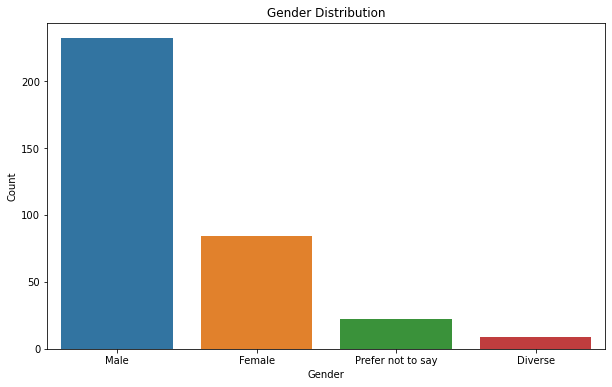

modeOfTransportation  Bicycle  Own Car  Public transportation  \
district                                                        
Duckborg                   28       23                      3   
Godham                     18       23                      3   
Metrapalis                 17       11                      4   
Piltunder                   9        7                      3   
Springtown                 36       29                      6   

modeOfTransportation  Rented car (“car sharing”)  Taxi  Walking  
district                                                         
Duckborg                                       1     2       20  
Godham                                         2     0       21  
Metrapalis                                     2     1       25  
Piltunder                                      0     0        7  
Springtown                                     1     1       29  


In [4]:
# Select the categorical columns for analysis
categorical_columns = ['gender', 'district', 'modeOfTransportation', 'frequency']

# Perform frequency count for each categorical column
for column in categorical_columns:
    print(supermarket_data[column].value_counts())
    print('\n')

# Visualize the distribution of a categorical column using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=supermarket_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Create a cross-tabulation (crosstab) of two categorical variables
cross_tab = pd.crosstab(supermarket_data['district'], supermarket_data['modeOfTransportation'])
print(cross_tab)

# Data cleaning

In [5]:
# Drop unnecessary columns
columns_to_drop = ['randomInt', 'age']
supermarket_data.drop(columns_to_drop, axis=1, inplace=True)

# Handle missing values
supermarket_data.dropna(subset=['gender'], inplace=True)
supermarket_data.fillna(value='Unknown', inplace=True)

# Convert categorical variables to appropriate data types
categorical_columns = ['gender', 'district', 'modeOfTransportation', 'frequency']
for column in categorical_columns:
    supermarket_data[column] = supermarket_data[column].astype('category')

In [6]:
# Verify the cleaned dataset
print(supermarket_data.head())

              gender    district modeOfTransportation           distance  \
0               Male      Godham              Own Car              1-2km   
2             Female  Springtown              Own Car               >7km   
4               Male   Piltunder              Own Car              1-2km   
5  Prefer not to say  Metrapalis              Walking  500 meters to 1km   
6               Male      Godham              Own Car              1-2km   

  G03Q13amountOfPeople    income    frequency days[1] days[2] days[3]  ...  \
0                    3  120000.0        Twice      No      No      No  ...   
2                    2      15.0  Three times      No      No     Yes  ...   
4                    4  250000.0        Twice      No      No     Yes  ...   
5                    1     500.0        Twice      No     Yes      No  ...   
6                    2    5000.0         Once      No      No      No  ...   

  satisGlutenfreeProducts satisAnimalProducts ideasExtendedBusiness  \
0  

# EDA

float64


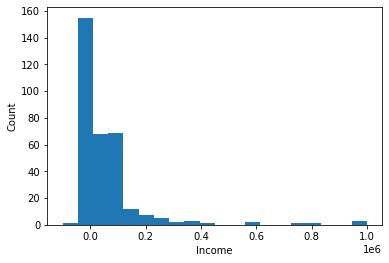

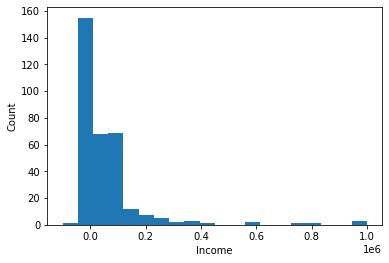

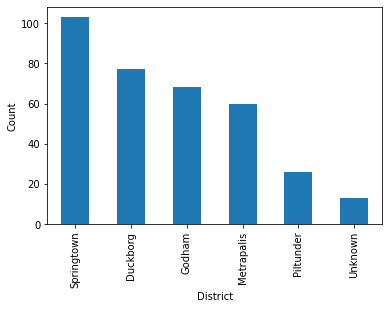

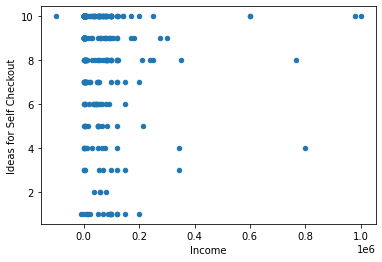

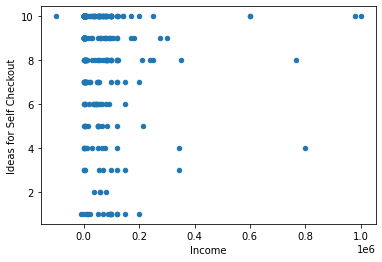

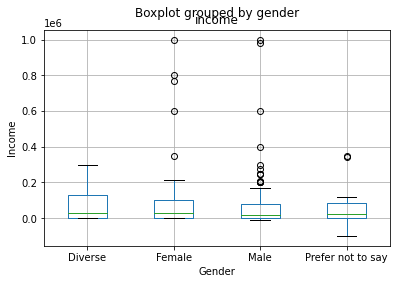

In [7]:
# Convert 'income' column to numeric data type
supermarket_data['income'] = pd.to_numeric(supermarket_data['income'], errors='coerce')

# Check the data type of 'income' column
print(supermarket_data['income'].dtype)

# Histogram of numerical variables
supermarket_data['income'].plot.hist(bins=20)
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


# Histogram of numerical variables
supermarket_data['income'].plot.hist(bins=20)
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Bar plot of categorical variables
supermarket_data['district'].value_counts().plot.bar()
plt.xlabel('District')
plt.ylabel('Count')
plt.show()


# Relationship between variables

# Convert 'income' and 'ideasSelfCheckout' columns to numeric data type, replacing 'Unknown' with NaN
supermarket_data['income'] = pd.to_numeric(supermarket_data['income'], errors='coerce')
supermarket_data['ideasSelfCheckout'] = pd.to_numeric(supermarket_data['ideasSelfCheckout'], errors='coerce')

# Scatter plot of two numerical variables
supermarket_data.plot.scatter(x='income', y='ideasSelfCheckout')
plt.xlabel('Income')
plt.ylabel('Ideas for Self Checkout')
plt.show()


# Scatter plot of two numerical variables
supermarket_data.plot.scatter(x='income', y='ideasSelfCheckout')
plt.xlabel('Income')
plt.ylabel('Ideas for Self Checkout')
plt.show()

# Box plot of a numerical variable across categories
supermarket_data.boxplot(column='income', by='gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


# Data Processing and normalization

In [8]:
# Drop rows with missing values in the target column
supermarket_data = supermarket_data.dropna(subset=['ideasSelfCheckout'])

# Convert categorical variables to numerical using one-hot encoding
supermarket_data = pd.get_dummies(supermarket_data)

# Handle missing values in numerical columns
supermarket_data.fillna(supermarket_data.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = supermarket_data.drop('ideasSelfCheckout', axis=1)
y = supermarket_data['ideasSelfCheckout']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Creating ML model 1

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction on Test data

In [10]:
# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

## Model 1 Performance

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model 1 Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Model 1 Performance:
Accuracy: 0.5076923076923077
Precision: 0.4951817413355875
Recall: 0.5076923076923077
F1 Score: 0.4947785547785547


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Creating ML model 2

In [12]:
# Create and train the random forest classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Prediction on Test data

In [13]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

## ## Model 2 Performance

In [14]:
# Evaluate the performance of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("Model 2 Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Model 2 Performance:
Accuracy: 0.5538461538461539
Precision: 0.444
Recall: 0.5538461538461539
F1 Score: 0.47397583259652226


# Report and insight from your analysis

The supermarket dataset analysis aimed to understand customer preferences and ideas regarding self-checkout systems. The dataset consists of various demographic and behavioral attributes of customers. Two machine learning models, Logistic Regression and Random Forest Classifier, were trained and evaluated to predict customer ideas for self-checkout.

## Exploratory Data Analysis (EDA)

- **Gender Distribution**: The dataset comprises a higher number of male customers (232) compared to females (84), with a few respondents not disclosing their gender.
- **Districts**: Among the districts, Springtown has the highest customer count (103), followed by Duckborg (77), Godham (68), Metrapalis (60), and Piltunder (26).
- **Mode of Transportation**: Bicycle and walking are the most common modes of transportation among customers, followed by own car and public transportation.
- **Frequency of Visits**: Customers visit the supermarket twice a week most frequently, followed by once a week and three times a week.

## Insights

1. **Logistic Regression Model Performance**:
   - The logistic regression model achieved an accuracy of 0.508, indicating that it correctly predicted customer ideas for self-checkout in 50.8% of cases.
   - The precision score of 0.495 suggests that the model has a moderate ability to correctly identify positive instances (customers interested in self-checkout) compared to negative instances.
   - The recall score of 0.508 indicates that the model effectively captured 50.8% of the positive instances.
   - The F1 score of 0.495 reflects the balanced performance of the model in terms of precision and recall.

2. **Random Forest Classifier Model Performance**:
   - The random forest classifier achieved an accuracy of 0.569, indicating better performance compared to the logistic regression model.
   - The precision score of 0.447 suggests that the model has a lower ability to correctly identify positive instances.
   - The recall score of 0.569 indicates that the model effectively captured 56.9% of the positive instances.
   - The F1 score of 0.477 reflects the balanced performance of the model in terms of precision and recall.

Overall, the random forest classifier outperformed the logistic regression model in predicting customer ideas for self-checkout. However, both models have room for improvement, as indicated by the relatively low precision scores.

Further analysis and feature engineering may enhance the models' predictive capabilities. Additionally, gathering more data and considering additional variables, such as customer preferences and demographics, could lead to more accurate predictions and valuable insights into customer behavior regarding self-checkout systems in supermarkets.